## Name : Roger Kewin Samson
## Hawk ID : A20563057
## HomeWork 2

## 1.Add Guassian Noise and Compute SNR:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)  

# Parameters for Gaussian noise
std_dev = 20  # Standard deviation
mean = 0  # Mean of noise
num_noisy_images = 10  

noisy_images = []
for i in range(num_noisy_images):
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32)
    noisy_image = np.clip(image + noise, 0, 255)  # Clip values
    noisy_images.append(noisy_image)
noise_power = np.mean([np.var(noisy_image - image) for noisy_image in noisy_images])

# Compute the signal power
signal_power = np.var(image)

# Compute the SNR in decibels (dB)
snr_db = 10 * np.log10(signal_power / noise_power)


print(f"Signal Power: {signal_power}")
print(f"Noise Power: {noise_power}")
print(f"SNR (dB): {snr_db}")


Signal Power: 3449.133056640625
Noise Power: 374.65972900390625
SNR (dB): 9.640729427337646


## 2. Implement a Convolution Filter for Smoothing

Manual convolution time: 3.30800 seconds
OpenCV convolution time: 0.00804 seconds


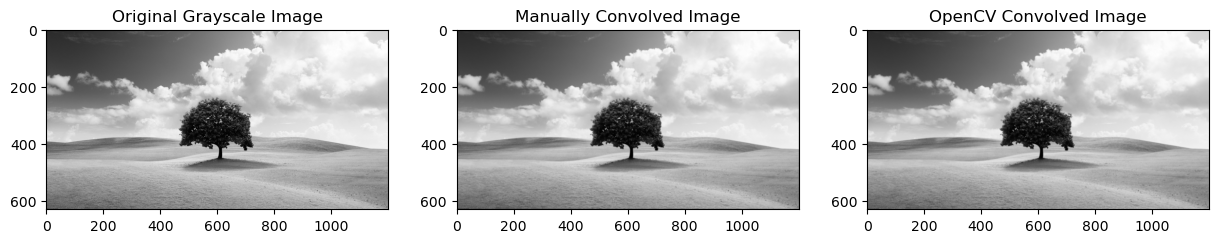

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

def manual_convolution(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output_image[i, j] = np.sum(kernel * padded_image[i:i + kernel_height, j:j + kernel_width])

    return output_image

image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3)) / 9.0

start_manual = time.time()
smoothed_image_manual = manual_convolution(image, kernel)
end_manual = time.time()

start_opencv = time.time()
smoothed_image_opencv = cv2.filter2D(image, -1, kernel)
end_opencv = time.time()

print(f"Manual convolution time: {end_manual - start_manual:.5f} seconds")
print(f"OpenCV convolution time: {end_opencv - start_opencv:.5f} seconds")

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1, 3, 2)
plt.imshow(smoothed_image_manual, cmap='gray')
plt.title("Manually Convolved Image")
plt.subplot(1, 3, 3)
plt.imshow(smoothed_image_opencv, cmap='gray')
plt.title("OpenCV Convolved Image")
plt.show()

## 3. Convolution with Stride:

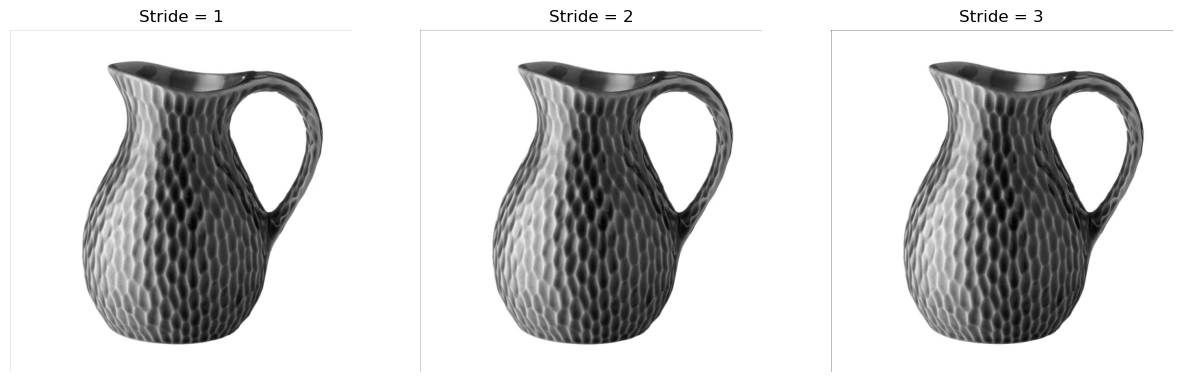

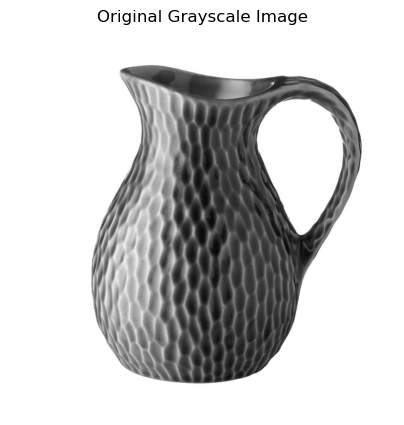

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convolution_with_stride(image, kernel, stride=2):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    padded_image = np.pad(image, ((pad_h, pad_w), (pad_h, pad_w)), mode="constant")
    output_h = ((image_h - kernel_h) // stride) + 1
    output_w = ((image_w - kernel_w) // stride) + 1

    output_image = np.zeros((output_h, output_w), dtype=np.float32)

    for i in range(0, output_h * stride, stride):
        for j in range(0, output_w * stride, stride):
            region = padded_image[i:i+kernel_h, j:j+kernel_w]  # Extract 3x3 region
            output_image[i//stride, j//stride] = np.sum(region * kernel)  # Compute sum

    return output_image
image = cv2.imread("jug.jpg", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3)) / 9.0  
stride_values = [1, 2, 3]

plt.figure(figsize=(15, 5))

for idx, stride in enumerate(stride_values, 1):
    smoothed_image_stride = convolution_with_stride(image, kernel, stride=stride)
    
    plt.subplot(1, len(stride_values), idx)
    plt.imshow(smoothed_image_stride, cmap="gray")
    plt.title(f"Stride = {stride}")
    plt.axis("off")

plt.figure(figsize=(5,5))
plt.imshow(image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")

plt.show()


## 4. Compute and Apply a Gaussian Smoothing Filter:
Gaussian smoothing is a technique to remove noise and smooth an image. It applies a Gaussian filter



cv2.filter2D() applies the Gaussian filter to the image.

It smooths out details and removes noise.
After applying Gaussian smoothing, the image becomes less noisy and smoother.


Gaussian Kernel (5x5):
 [[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


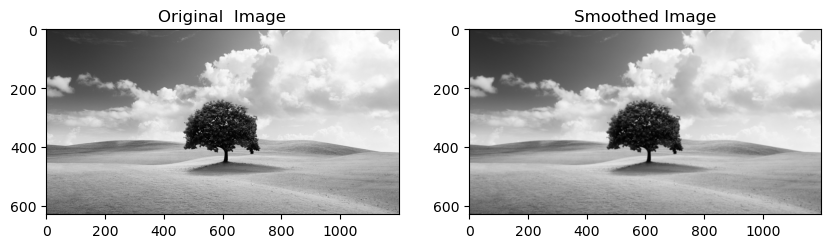

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

image = cv2.imread('NATURE.jpg', cv2.IMREAD_GRAYSCALE)

kernel_size = 5
sigma = 1.0
gaussian_kernel_2d = gaussian_kernel(kernel_size, sigma)
print("Gaussian Kernel (5x5):\n", gaussian_kernel_2d)

smoothed_image = cv2.filter2D(image, -1, gaussian_kernel_2d)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original  Image")
plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title("Smoothed Image")
plt.show()

## 5. Gaussian Pyramid Construction:



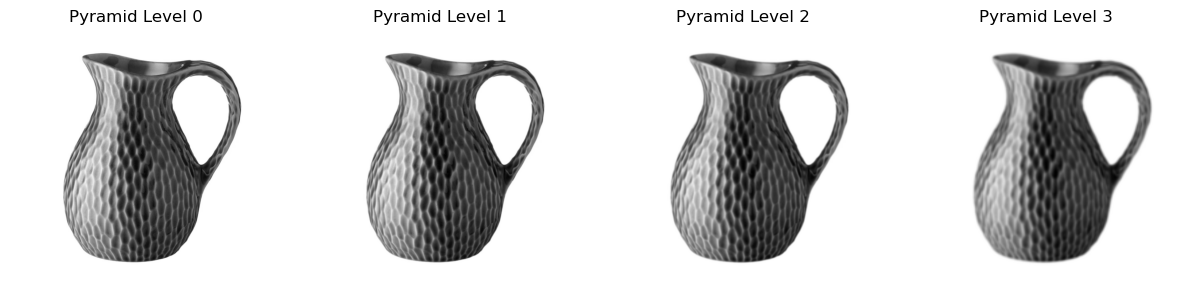

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a Gaussian Pyramid
def gaussian_pyramid(image, levels=3):
    pyramid = [image]  # Start with original image
    for _ in range(levels):
        image = cv2.pyrDown(image)  # Downsample
        pyramid.append(image)
    return pyramid

image = cv2.imread("jug.jpg", cv2.IMREAD_GRAYSCALE)
pyramid_layers = gaussian_pyramid(image, levels=3)

resized_pyramid_layers = [cv2.resize(layer, (image.shape[1], image.shape[0])) for layer in pyramid_layers]
plt.figure(figsize=(15, 5))

for i, layer in enumerate(resized_pyramid_layers, 1):
    plt.subplot(1, len(resized_pyramid_layers), i)
    plt.imshow(layer, cmap="gray")
    plt.title(f"Pyramid Level {i-1}")
    plt.axis("off")

plt.show()


## 6. Transposed Convolution



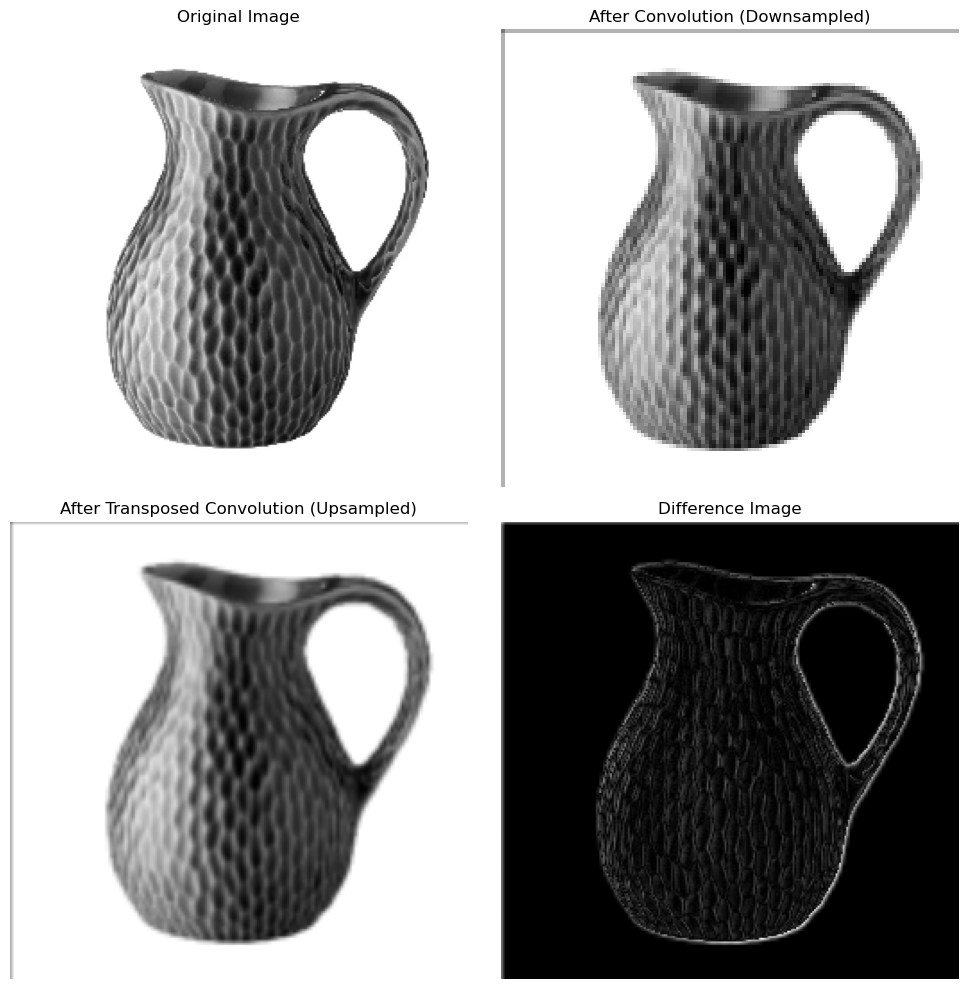

In [44]:
import torch
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "jug.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (256, 256))  # Resize to fixed size
image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0  # Shape: [1, 1, H, W]

# Define a 3x3  kernel and normalize
gaussian_kernel = torch.tensor(
    [[[[1, 2, 1], 
       [2, 4, 2], 
       [1, 2, 1]]]], dtype=torch.float32
)  # Shape: [1, 1, 3, 3]
gaussian_kernel /= gaussian_kernel.sum()  # Normalize
conv_result = F.conv2d(image_tensor, gaussian_kernel, stride=2, padding=1)  # Stride=2 for downsampling

trans_conv_result = F.conv_transpose2d(conv_result, gaussian_kernel, stride=2, padding=1)
# Convert tensors to numpy arrays for visualization
original_image = image_tensor.squeeze().numpy()
downsampled_image = conv_result.squeeze().detach().numpy()
upsampled_image = trans_conv_result.squeeze().detach().numpy()
downsampled_image /= downsampled_image.max()
upsampled_image /= upsampled_image.max()
upsampled_image_resized = cv2.resize(upsampled_image, (256, 256), interpolation=cv2.INTER_LINEAR)

diff_image = np.abs(original_image - upsampled_image_resized)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles = ["Original Image", "After Convolution (Downsampled)",
          "After Transposed Convolution (Upsampled)", "Difference Image"]
images = [original_image, downsampled_image, upsampled_image_resized, diff_image]
for ax, img, title in zip(axes.ravel(), images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")
plt.tight_layout()
plt.show()


## 7. Image Gradients and Histogram of Gradient Directions

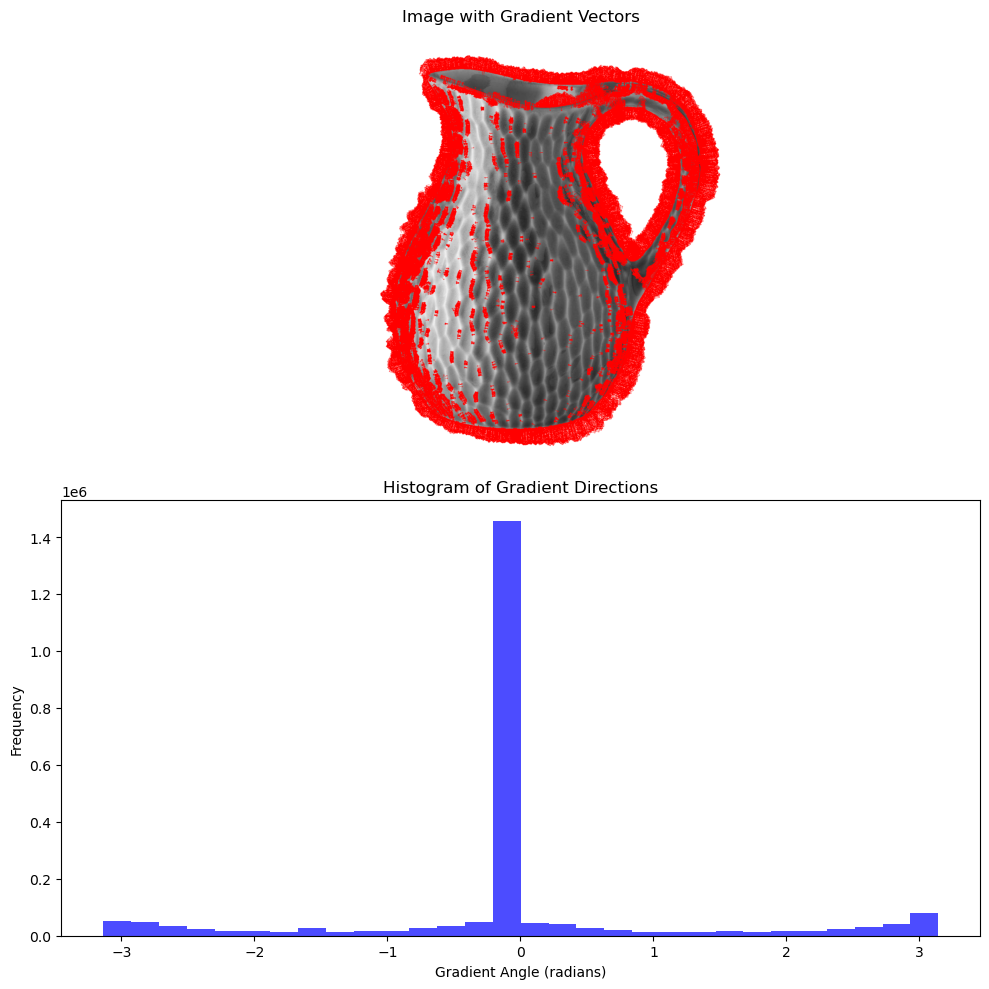

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("jug.jpg", cv2.IMREAD_GRAYSCALE)

grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # X-gradient
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Y-gradient

# Compute magnitude and direction of the gradient
magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x)
image_with_vectors = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
threshold = 100
strong_magnitudes = magnitude > threshold
y_coords, x_coords = np.where(strong_magnitudes)
for y, x in zip(y_coords, x_coords):
    dx = int(grad_x[y, x] / 10)  # Scale for visualization
    dy = int(grad_y[y, x] / 10)
    start_point = (x, y)
    end_point = (x + dx, y + dy)
    cv2.arrowedLine(image_with_vectors, start_point, end_point, (0, 0, 255), 1, tipLength=0.3)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(image_with_vectors, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.title("Image with Gradient Vectors")
plt.axis("off")

plt.subplot(2, 1, 2)
plt.hist(direction.ravel(), bins=30, color='blue', alpha=0.7)
plt.title("Histogram of Gradient Directions")
plt.xlabel("Gradient Angle (radians)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


 ## 8. Gaussian Derivatives Gradients


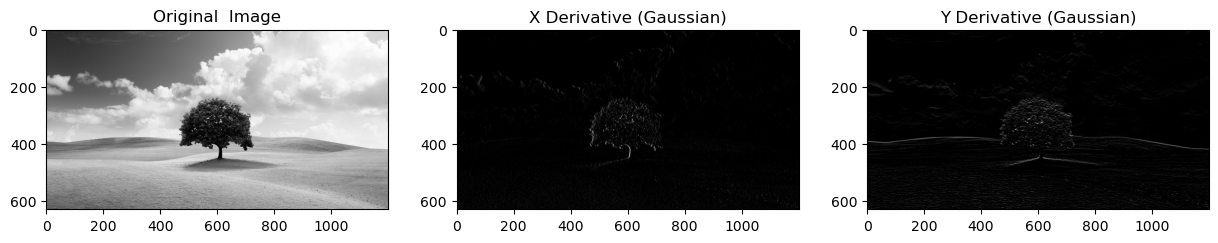

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_1d(size, sigma):
    k = size // 2
    x = np.arange(-k, k+1)
    gaussian = np.exp(-x**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)
    return gaussian / gaussian.sum()

def gaussian_derivative_1d(size, sigma):
    k = size // 2
    x = np.arange(-k, k+1)
    gaussian_derivative = -x * np.exp(-x**2 / (2 * sigma**2)) / (sigma**3 * np.sqrt(2 * np.pi))
    return gaussian_derivative / np.sum(np.abs(gaussian_derivative))

kernel_size = 5
sigma = 1.0

# Compute 1D filters
gaussian_x = gaussian_1d(kernel_size, sigma).reshape(1, -1)
gaussian_y = gaussian_1d(kernel_size, sigma).reshape(-1, 1)

gaussian_derivative_x = gaussian_derivative_1d(kernel_size, sigma).reshape(1, -1)
gaussian_derivative_y = gaussian_derivative_1d(kernel_size, sigma).reshape(-1, 1)

image = cv2.imread("nature.jpg", cv2.IMREAD_GRAYSCALE)
# Detect X derivative 
image_x_derivative = cv2.filter2D(image, -1, gaussian_derivative_x)
image_x_derivative = cv2.filter2D(image_x_derivative, -1, gaussian_y)

image_y_derivative = cv2.filter2D(image, -1, gaussian_derivative_y)
image_y_derivative = cv2.filter2D(image_y_derivative, -1, gaussian_x)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original  Image")
plt.subplot(1, 3, 2)
plt.imshow(image_x_derivative, cmap="gray")
plt.title("X Derivative (Gaussian)")
plt.subplot(1, 3, 3)
plt.imshow(image_y_derivative, cmap="gray")
plt.title("Y Derivative (Gaussian)")
plt.show()


## 9. Laplacian of Gaussian (LoG) Edge Detection

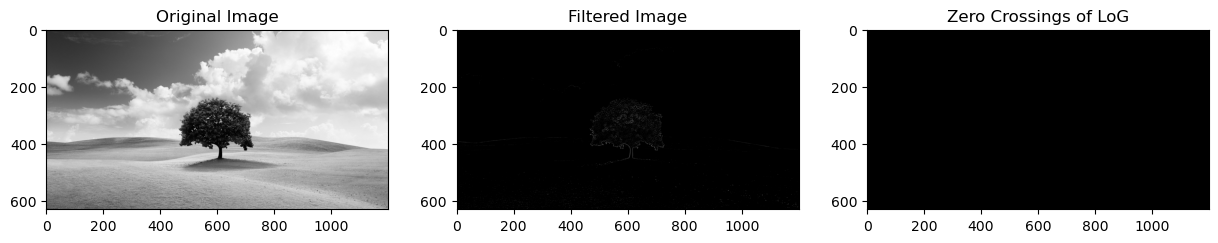

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def laplacian_of_gaussian(size, sigma):
    x = np.linspace(-size//2, size//2, size)
    y = np.linspace(-size//2, size//2, size)
    xx, yy = np.meshgrid(x, y)

    g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
    log = -(1/(np.pi*sigma**4)) * (1 - (xx**2 + yy**2)/(2*sigma**2)) * g
    return log / np.sum(np.abs(log))

def apply_log(image, size, sigma):
    log_filter = laplacian_of_gaussian(size, sigma)
    log_filtered_image = cv2.filter2D(image, -1, log_filter)
    return log_filtered_image

def detect_zero_crossings(log_image):
    zero_crossings = np.zeros_like(log_image, dtype=np.uint8)

    zero_crossings[:, :-1] |= (log_image[:, :-1] > 0) & (log_image[:, 1:] < 0)
    zero_crossings[:, 1:] |= (log_image[:, :-1] < 0) & (log_image[:, 1:] > 0)

    zero_crossings[:-1, :] |= (log_image[:-1, :] > 0) & (log_image[1:, :] < 0)
    zero_crossings[1:, :] |= (log_image[:-1, :] < 0) & (log_image[1:, :] > 0)

    return zero_crossings

image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

size = 5
sigma = 1.0
log_filtered_image = apply_log(image, size, sigma)

zero_crossings = detect_zero_crossings(log_filtered_image)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(log_filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.subplot(1, 3, 3)
plt.imshow(zero_crossings, cmap='gray')
plt.title("Zero Crossings of LoG")
plt.show()